# Week 3 Assignment:  Practicing with NumPy + Matplolib via basic analysis and visualization of ARGO data 
### What is ARGO data?
- vertical profiles of pressure, temperature, salinity, etc. collected by a fleet of robotic instruments
- drift with the ocean currents, sinks and rises
- spend most of time under the surface! 
- the instruments collect extremely valuable data that helps us:
  - better estimate heat storage in the ocean (and thus sea level rise predictions)
  - better evaluate changes in salinity (and tie these to changes in global rainfall)

### Where is ARGO data collected?
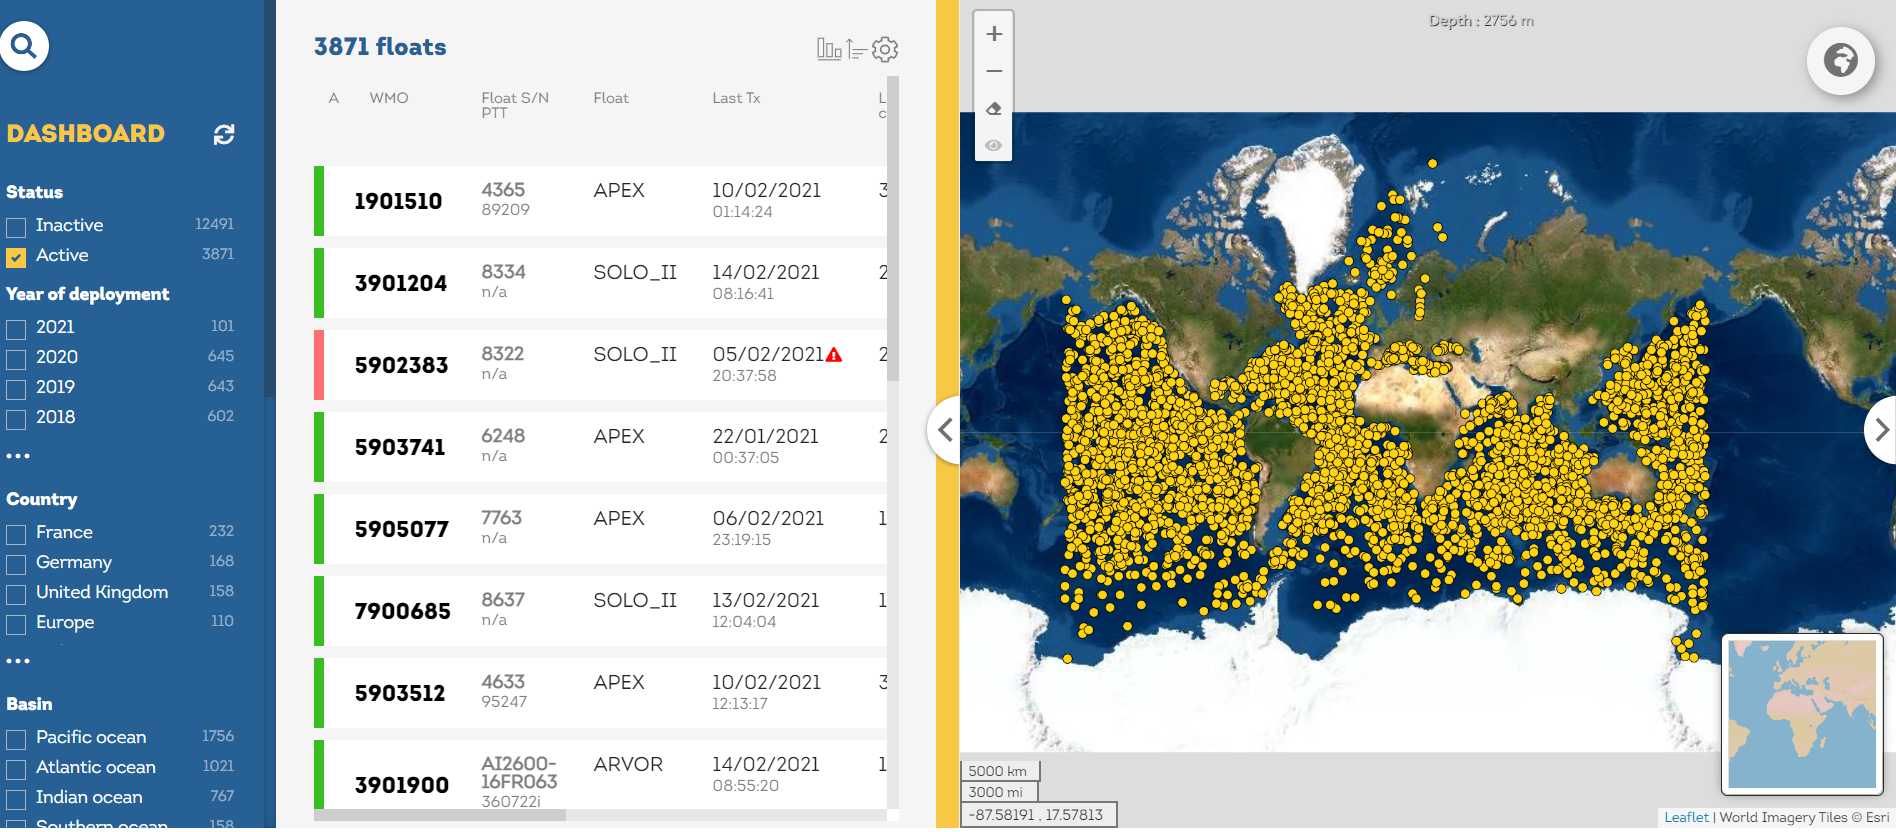  
(Can't see this image?  Visit: https://fleetmonitoring.euro-argo.eu/dashboard )
  
### Where can we access ARGO data?
- nice outline of options for data access: https://argo.ucsd.edu/data/
    - Example: http://www.argodatamgt.org/


### Want more information on ARGO data?
- https://argo.ucsd.edu/about/
- https://youtu.be/PzHZdwaBr_Q (neat video about the journey of an ARGO float!)


### How are we using ARGO data in this assignment?
- data from a single "float" (instrument), collected between 2012-2014, as it journeys through the ocean - drifting and sinking and rising!
<br><br>
- **variables**: 
  - temperature (in degrees C)
  - salinity (saltiness; in psu)
  - pressure (weight of ocean above; in dbar)
  - latitude (deg N or S)
  - longitude (deg E or W)
  - date (remember that the float drifts with the ocean currents.... so each vertical profile of temperature, salinity, and pressure is associated with a given date/time and a given location - i.e., the latitude/longitude point) 
<br><br>
- **format**:  special NumPy array format - since you haven't learned much yet about reading in and working with data from Netcdf files (which is native format of current ARGO data)
  - note: when you read in the data from the file, it is a data object that contains multiple arrays
     - you'll find soon that this is analogous to data objects in Xarray (package we use for spatial data, especially that of Netcdf format)

#### (a.)
- import the NumPy package
- import the pyplot package from the Matplotlib package

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#### (b.)
- download the ARGO data from the Week 3 Assignment folder, 'argo_float_4901412.npz'

#### (c.)
- load the data file (I'll do this for you!)

In [2]:
# np.load loads in data from a special NumPy array file format
data = np.load('argo_float_4901412.npz')

# These are the arrays contained in this data object
# Salinity, temperature, vertical levels in the ocean, longitude, date/time, pressure, and latitude in the order they appear 
print(data.files)

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']


#### (d.)
- extract the arrays shown in (c.) to NumPy array variables of the same name
  - *hint*: T = data['T'] to access each array within the 'data' data object - like a key for a dictionary
- print out the values of the latitude, longitude, and date variables

In [3]:
T = data['T']
S = data['S']
P = data['P']
lat = data['lat']
lon = data['lon']
levels = data['levels']
date = data['date']

In [4]:
print(date)
print(levels)
print(lat)
print(lon)

['2012-07-13T22:33:06.019200000' '2012-07-23T22:54:59.990400000'
 '2012-08-02T22:55:52.003200000' '2012-08-12T23:08:59.971200000'
 '2012-08-22T23:29:01.968000000' '2012-09-01T23:17:38.976000000'
 '2012-09-12T02:59:18.960000000' '2012-09-21T23:18:37.036800000'
 '2012-10-02T03:00:17.971200000' '2012-10-11T23:13:27.984000000'
 '2012-10-22T02:50:32.006400000' '2012-10-31T23:36:39.974400000'
 '2012-11-11T02:40:46.041600000' '2012-11-20T23:08:29.990400000'
 '2012-12-01T02:47:51.993600000' '2012-12-10T23:23:16.972800000'
 '2012-12-21T02:58:48.979200000' '2012-12-30T23:07:23.030400000'
 '2013-01-10T02:56:43.008000000' '2013-01-19T23:24:26.956800000'
 '2013-01-30T02:43:53.011200000' '2013-02-08T23:15:27.043200000'
 '2013-02-19T01:12:50.976000000' '2013-02-28T23:07:13.008000000'
 '2013-03-11T02:43:30.979200000' '2013-03-20T23:17:22.992000000'
 '2013-03-31T01:50:38.025600000' '2013-04-09T23:19:07.968000000'
 '2013-04-20T02:53:29.990400000' '2013-04-29T23:28:33.024000000'
 '2013-05-10T02:50:18.009

#### (e.)
- prove to yourself that each of the data structures is a NumPy array
- show me one example of this!

In [5]:
print(type(T))
print(type(S))
print(type(P))
print(type(lon))
print(type(lat))
print(type(lon))
print(type(date))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### (f.)
- evaluate and print out the shape of S, T, P, lat, lon, and levels  
- *Note*: levels is UNITLESS
- from your above evaluations, please identify and name what the two dimensions of S, T, and P are (and tell me in a comment)

In [6]:
print(np.shape(S))
print(np.shape(T))
print(np.shape(P))
print(np.shape(lat))
print(np.shape(lon))
print(np.shape(levels))

# The two dimensions of S, T, and P are (vertical levels going down into the ocean, location (lat/lon pair))

(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(78,)


#### (g.) evaluate/calculate and print:
- are there NaNs?
- if so, how many there are in each array (S, T, and P)
- how this compares to the total # of elements in each array (S, T, and P)
- the percent of NaNs in each array (S, T, and P) (relative to the total # of data points in each array)

In [7]:
print(np.sum(np.isnan(T))) # Or could have saved these each into a variable for use further down
print(np.sum(np.isnan(P)))
print(np.sum(np.isnan(S)))
# Yes, there are NaNS for each T, S, and P

101
91
101


In [8]:
print(np.size(T))
print(np.size(P))
print(np.size(S))
# Only a small fraction of all values are NaN, but we still have to take into account there being NaNs moving forward

5850
5850
5850


In [9]:
# np.size gives us total number of elements in each array, which is what we need in the denominator of this calculation
print(np.sum(np.isnan(T))/np.size(T)*100)
print(np.sum(np.isnan(P))/np.size(P)*100)
print(np.sum(np.isnan(S))/np.size(S)*100)
# Yep, fairly small percentage 

1.7264957264957266
1.5555555555555556
1.7264957264957266


#### (h.) calculate and print the maximum and minimum value of each array (S, T, and P), over ALL depths and ALL latitude/longitude points

In [10]:
# Must use nanmax, nanmin functions since we haven't yet learned how to deal properly with NaNs
# round to the nearest decimal point - can be handy!
maxT = np.round(np.nanmax(T),1)
minT = np.round(np.nanmin(T),1) 

maxP = np.round(np.nanmax(P),1)
minP = np.round(np.nanmin(P),1) 

maxS = np.round(np.nanmax(S),1)
minS = np.round(np.nanmin(S),1) 

In [11]:
# I outputted units, some helpful text, etc., but you didn't have to do this
print('Max temp: '+ str(maxT)+' \u00b0C')
print('Min temp: '+ str(minT)+' \u00b0C')

print('Max pressure: '+ str(maxP)+' dbar')
print('Min pressure: '+ str(minP)+' dbar')

print('Max salinity: '+ str(maxS)+' psu')
print('Min salinity: '+ str(minS)+' psu')

Max temp: 24.4 °C
Min temp: 3.5 °C
Max pressure: 2001.5 dbar
Min pressure: 0.3 dbar
Max salinity: 36.3 psu
Min salinity: 34.9 psu


#### (i.) 
*Keep in mind that you've shown that S, T, and P are two dimensional variables and what each dimension is. Now:*
- create a line plot for each of these variables, initially just for the *first* latitude/longitude point in the dataset
   - we want the vertical axis of this plot to be the vertical levels in the ocean 
      - please reverse the vertical axis, so it reads, from top to bottom, 0 to 77, as the "higher" values of the 'level' variable are actually points *deeper* in the ocean
   - and the horizontal axis of this plot to be the quantity of interest
   - you must label both axises (including units - see start of assignment), and add a title 

Text(0, 0.5, 'Vertical levels')

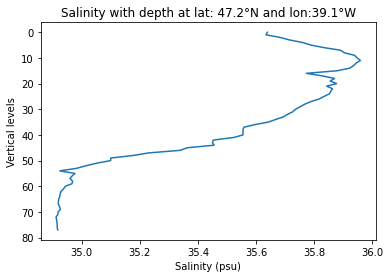

In [12]:
fig, ax = plt.subplots() # no argument, so creates fig, ax for one plot

ax.plot(S[:,0],levels) # all depths, just the first location 
ax.invert_yaxis() # super handy way of inverting y-axis 
                                                # I haven't taught you formatting yet, officially
ax.set_title('Salinity with depth at lat: '+str(round(lat[0],1))+'\u00b0N and lon:'+str(round(abs(lon[0]),1))+'\u00b0W')
ax.set_xlabel('Salinity (psu)')
ax.set_ylabel('Vertical levels')

Text(0, 0.5, 'Vertical levels')

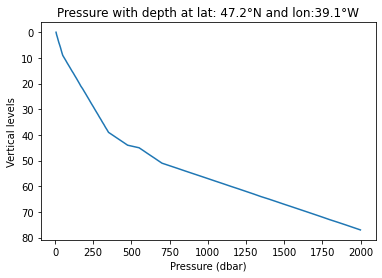

In [13]:
fig, ax = plt.subplots() # no argument, so creates fig, ax for one plot

ax.plot(P[:,0],levels) 
ax.invert_yaxis() # super handy way of inverting y-axis 
ax.set_title('Pressure with depth at lat: '+str(round(lat[0],1))+'\u00b0N and lon:'+str(round(abs(lon[0]),1))+'\u00b0W')
ax.set_xlabel('Pressure (dbar)')
ax.set_ylabel('Vertical levels')

Text(0, 0.5, 'Vertical levels')

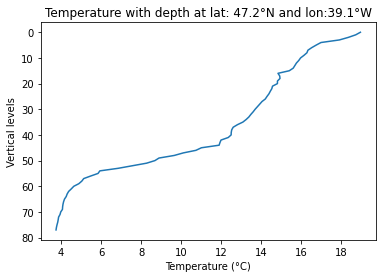

In [14]:
fig, ax = plt.subplots() # no argument, so creates fig, ax for one plot

ax.plot(T[:,0],levels) 
ax.invert_yaxis() # super handy way of inverting y-axis 
ax.set_title('Temperature with depth at lat: '+str(round(lat[0],1))+'\u00b0N and lon:'+str(round(abs(lon[0]),1))+'\u00b0W')
ax.set_xlabel('Temperature (\u00b0C)')
ax.set_ylabel('Vertical levels')

#### (j.) 
- now, let's take your plotting up a notch!
- you'll still create THREE plots in total, one for each S, P, and T
  - with appropriate titles, axis labels, etc.
<br><br>
- with vertical axis being levels (reversed) and horizontal axis being values of the given variable, like you did in (i.)
<br><br>
- but now you'll have many profiles on the same plot -- data of that variable collected at each and every lat/lon gridpoint contained in the dataset
   - no legends necessary
- there are multiple ways to do this
   - the simplest involves being clever in your line(s) of code that does the plotting 
<br><br>
- *option if you want to challenge yourself - ungraded*
  - instead, plot all three of the above-described plots on a single plot that consists of 3 subplots 

Text(0.5, 1.0, 'Temperature with depth, for all locations of the buoy')

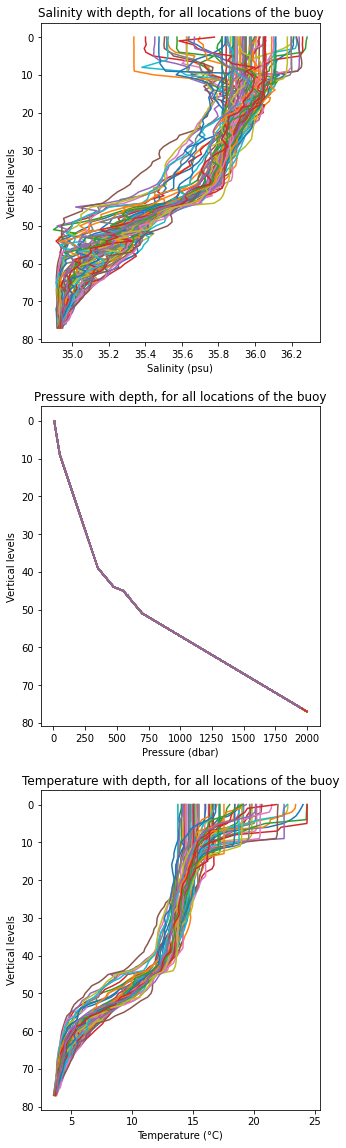

In [15]:
fig, axes = plt.subplots(3,figsize=(5,20))

axes[0].plot(S,levels) # x-axis: 2D salinity, y-axis: 1D levels, that is first dimension of salinity 
                       # so you get multiple line plots on the same plot, of salinity at each location 
axes[0].invert_yaxis()
axes[0].set_xlabel('Salinity (psu)')
axes[0].set_ylabel('Vertical levels')
axes[0].set_title('Salinity with depth, for all locations of the buoy')

axes[1].plot(P,levels)
axes[1].invert_yaxis()
axes[1].set_xlabel('Pressure (dbar)')
axes[1].set_ylabel('Vertical levels')
axes[1].set_title('Pressure with depth, for all locations of the buoy')

axes[2].plot(T,levels)
axes[2].invert_yaxis()
axes[2].set_xlabel('Temperature (\u00b0C)')
axes[2].set_ylabel('Vertical levels')
axes[2].set_title('Temperature with depth, for all locations of the buoy')


#### (k.)
Now, let's interpret the plots you produced in (j.)
<br><br>
- (a.) For each variable (so, for each plot) - **visually**, at which levels is there the greatest spread of values w/ location? 
<br><br>
- (b.) What formal, simple statisical metric could we use to quantiatively evaluate spread?
<br><br>
- (c.) Calculate spread at each height for each variable using this metric, and create a plot for each - so, a vertical profile of spread (x-axis) with depth (y-axis) for each variable - there'll be a SINGLE line on each plot, yes?

In [16]:
# (a.) Visually

# Salinity - first 10 levels below the surface
# Pressure - virtually none
# Temperature - first 10 levels below the surface 

In [17]:
# (b.) Standard deviation is the first that comes to mind!

In [18]:
# (c.) Calculate standard deviation

# Spread at each vertical level, over all locations
sdP = np.nanstd(P,axis=1) # average over second dimension - the locations
sdS = np.nanstd(S,axis=1)
sdT = np.nanstd(T,axis=1)

Text(0, 0.5, 'Vertical levels')

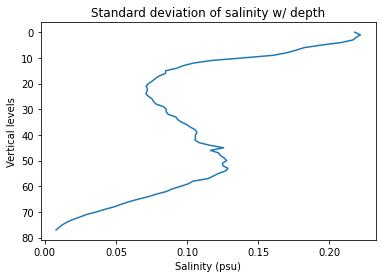

In [19]:
fig, ax = plt.subplots() # no argument, so creates fig, ax for one plot

ax.plot(sdS,levels) 
ax.invert_yaxis() # super handy way of inverting y-axis 
ax.set_title('Standard deviation of salinity w/ depth')
ax.set_xlabel('Salinity (psu)')
ax.set_ylabel('Vertical levels')

Text(0, 0.5, 'Vertical levels')

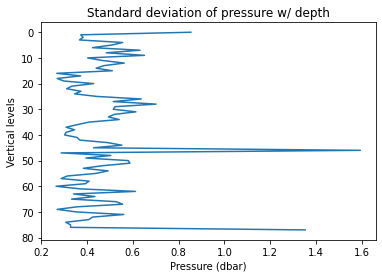

In [20]:
fig, ax = plt.subplots() # no argument, so creates fig, ax for one plot

ax.plot(sdP,levels) 
ax.invert_yaxis() # super handy way of inverting y-axis 
ax.set_title('Standard deviation of pressure w/ depth')
ax.set_xlabel('Pressure (dbar)')
ax.set_ylabel('Vertical levels')

Text(0, 0.5, 'Vertical levels')

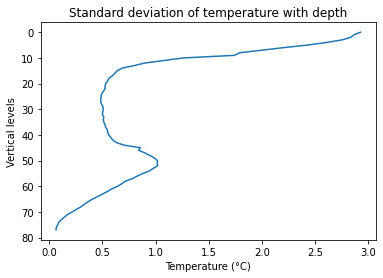

In [21]:
fig, ax = plt.subplots() # no argument, so creates fig, ax for one plot

ax.plot(sdT,levels) 
ax.invert_yaxis() # super handy way of inverting y-axis 
ax.set_title('Standard deviation of temperature with depth')
ax.set_xlabel('Temperature (\u00b0C)')
ax.set_ylabel('Vertical levels')

#### (l.)
- time to plot the locations where all these profiles were collected!
  - including axis labels!
- you haven't formally learned how to create a map yet, so simply use a scatter plot
<br><br>
- *options if you'd like to challenge yourself - ungraded*
  - know how to create maps?  plot this data on a map instead of scatter plot!
  - color-code the points by date!

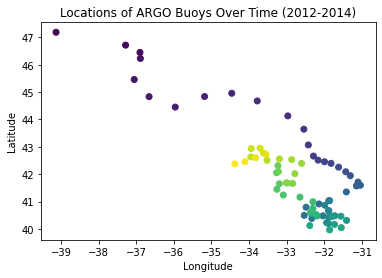

In [22]:
fig, ax = plt.subplots()
ax.scatter(lon, lat, c=date) # earlier times are purple 
ax.set_title('Locations of ARGO Buoys Over Time (2012-2014)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

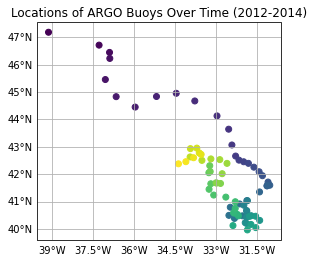

In [23]:
# On a map instead (optional)
import cartopy.crs as ccrs
proj=ccrs.PlateCarree() # a very basic map projection

fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
ax.scatter(lon, lat, c=date) # earlier times are purple!
ax.set_title('Locations of ARGO Buoys Over Time (2012-2014)')

gl = ax.gridlines(draw_labels=True) # add gridlines, and yes we want labels
gl.top_labels = False # specify where we do and don't want gridline labels
gl.right_labels = False
plt.show()